# Lab 3: Stochastic Gradient Descent

The goal of this lab session is to code an optimization algorithm that optimzes the penalized loss function of the logistic regression model.


We begin with the standard imports:

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from tqdm import tqdm

#filter warnings
import warnings
warnings.filterwarnings('ignore')

We import the dataset that we are going to use, an indian dataset including in the last column information about the diabetes status of patients:

In [3]:
from sklearn import model_selection

data = pd.read_csv("../data/w8a.csv", sep=";", header=None)
data_train, data_test = model_selection.train_test_split(data,test_size=0.33, random_state=32)
# X = data.iloc[:,:-1].to_numpy()
# y = data.iloc[:,-1].to_numpy()
#X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=32)
X_train = data_train.iloc[:, :-1].values
y_train = data_train.iloc[:, -1].values

X_test = data_test.iloc[:, :-1].values
y_test = data_test.iloc[:, -1].values
display(data)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1
49745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
49746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
49747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1


In [4]:
b_train=np.ones((len(X_train),1))
b_test=np.ones((len(X_test),1))
X_train=np.hstack((b_train,X_train))
X_test=np.hstack((b_test,X_test))

In [5]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(33331, 301) (16418, 301)
(33331,) (16418,)


## Logistic Regression



Today weâ€™ll be moving from linear regression to logistic regression, one of the simplest ways to deal with a classification problem. Instead of fitting a line, logistic regression models the probability that the outcome is 1 given the value of the predictor. In order to do this we need a function that transforms our predictor variable to a value between 0 and 1. Lots of functions can do that, but the logistic function is the most common choice:

$$f(z) = \frac{1}{1+\exp{-z}}.$$

To predict the class of our observations we'll have to minimize the corresponding loss function and as we are in a high-dimensional context we'll add an $l_2$ regularization to the model:

$$L(\textbf{w}) = \sum_{i=1}^n log(1+\exp(-y_i\textbf{w}^Tx_i))+\frac{\lambda}{2} \| \textbf{w} \|^2,$$

where $x_i$ is the vector of features for the observation $i$ and $y_i \in \{-1, 1\}$ is the class label.  


We first use the `sklearn` implementation:

In [6]:
#TODO
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty="l2",C=4).fit(X_train, y_train)   # lambda=1/C

c:\Users\zakar\anaconda3\envs\deep_learning_iot\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


and we compute the accuracy score to evaluate the model performance:

In [7]:
#TODO
log_reg.score(X_train,y_train)

0.988149170441931

In [8]:
log_reg.score(X_test,y_test)

0.984468266536728

In [9]:
acc=0
TP=0
FP=0
TN=0
FN=0
ypred=log_reg.predict(X_train)
y=y_train
for i in range(len(y)):
    if y[i]==ypred[i]:
        acc+=1
        if y[i]==1:
            TP+=1
        else:
            TN+=1
    else:
        if ypred[i]==1:
            FP+=1
        else:
            FN+=1
acc/=len(y)
precesion=TP/(TP+FP)
recall=TP/(TP+FN)
f1_score=2*precesion*recall/(precesion+recall)
d={"accuracy":acc,"precision":precesion,"recall":recall,"f1_score":f1_score,"TP":TP,"FP":FP,"TN":TN,"FN":FN}
print(d)


{'accuracy': 0.988149170441931, 'precision': 0.9270186335403726, 'recall': 0.6317460317460317, 'f1_score': 0.7514159848961612, 'TP': 597, 'FP': 47, 'TN': 32339, 'FN': 348}


### Assignment

Implement from scratch your own logistic regression model with stochastic gradient descent optimization. 

- Fill in the class

- Display the evolution of the cost function along iterations. Do this for several strategies for the setting of the learning rate

- Try the different acceleration strategies

- Train the model with the training set and evaluate its performance in the test set

In [10]:
class StochasticLogisticRegression():
    
    """ Class for logistic regression:
    
    Attributes:                                                                                 
    -----------                                                                              Default value
    coef_         : 1-dimensional np.array, coefficients / weights                         | None                
    lambd_        : float,                  regularization parameter                       | 0.1
    lr_           : float,                  the learning rate                              | 0.01
    bsize         : integer,                the size of the mini-batch >=1                 | 64
    gamma         : float,                  gamma coefficient                              | 0.999
    beta          : float,                  beta coefficient                               | 0.9
    eps           : float,                  epsilon coefficient                            | 10-8
    debias        : boolean,                indicates if we use the debiais correction     | False
    coef_history_ : list,                   the list of all visited betas/ weights         | []
    f_history_    : list ,                  the list of all evaluations in visited betas   | []
    thresh        : float,                  decision threshold for classification          | 0.5
    """
    
    def __init__(self, lambd=0.01, lr=1e-2, batchsize=64, gamma=0.5, beta=0.5, eps=1e-6, debias=False,
                 thresh=0.6):
        self.coef_         = None # weights
        self.lambd_        = lambd
        self.lr_           = lr
        self.bsize_        = batchsize
        self.gamma_        = gamma
        self.beta_         = beta
        self.eps_          = eps
        self.debias_       = debias
        self.coef_history_ = []
        self.f_history_    = []
        self.thresh_       = thresh

    def logistic(self, z):
        #TODO
        return 1/(1+np.exp(-z))

    def loss(self,coef,X,y):
        l=0
        for i in range(200):
            l += np.log(1 + np.exp(-y[i]*coef@(X[i].T)))
        l=l/len(y)
        l+=0.5*self.lambd_*coef@(coef.T)
        return l

    def grad_loss(self,coef,X,y,ids):
        g=np.array([0.0]*len(coef))
        for i in ids:
            g += -y[i]*X[i]*self.logistic(-y[i]*(coef)@(X[i].T))
        g=g/len(ids)
        g+=self.lambd_*coef
        return g

    def fit(self, X, y, lr=1e-1, bsize=64, max_iter=500, minibatch=False,method=None):
        self.bsize_ = bsize
        self.lr_ = lr
        """ Fit the data (X, y).
    
        Parameters:
        -----------                                                                         Default value
        X          : (num_samples, num_features) np.array, Design matrix                  | 
        y          : (num_sampes, ) np.array,              Output vector                  | 
        lr         : float,                                the learning rate              | 0.001
        bsize      : integer,                              the size of the mini-batch >=1 | 64
        max_iter   : integer,                              the number of epochs           | 100
        mini_batch : bool,                                 method used                    | False
        """
        #TODO
        if self.coef_==None:
            self.coef_=np.array([1.0]*len(X[0]))

        s_t = np.array([0.0] * len(self.coef_))
        m_t = np.array([0.0] * len(self.coef_))
        for i in range(max_iter):
            if minibatch:
                random_indices = np.random.choice(X.shape[0], size=bsize, replace=False)
                grad=self.grad_loss(self.coef_,X,y,random_indices)
            else:
                grad=self.grad_loss(self.coef_,X,y,range(len(y)))
            if method == 'vanilla':
                self.coef_ = self.coef_ - self.lr_ * grad
            elif method == 'adagrad':
                s_t += grad * grad
                self.coef_ = self.coef_ - self.lr_ / (np.sqrt(s_t + self.eps_)) * grad
            elif method == 'RMSprop':
                s_t = self.gamma_ * s_t + (1 - self.gamma_) * grad * grad
                self.coef_ = self.coef_ - self.lr_ / (np.sqrt(s_t + self.eps_)) * grad
            elif method == 'momentum':
                m_t = self.beta_ * m_t + self.lr_ * grad
                self.coef_ = self.coef_ - m_t
            elif method == 'ADAM':
                m_t = 1 / (1 - self.beta_ ** (i+1)) * (self.beta_ * m_t + (1 - self.beta_) * grad)
                s_t = 1 / (1 - self.gamma_ ** (i+1)) * (self.gamma_ * s_t + (1 - self.gamma_) * grad * grad)
                self.coef_ = self.coef_ - self.lr_ / (np.sqrt(s_t + self.eps_)) * m_t
            else:
                self.coef_ = self.coef_ - self.lr_*grad
            self.coef_history_.append(self.coef_)     
            self.f_history_.append(self.loss(self.coef_,X,y))
        
    def predict(self, X,threshold=0.6):
        """ Make binary predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array, Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array, Predictions (0 or 1)
        """
        #TODO
        proba=self.logistic(X@self.coef_) # return the proba P(G=1|X=xi)
        return np.where(proba>=threshold,1,-1)
    def accuracy_evaluation(self,X,y,threshold=0.6,margin=0,vizualisation=True):
        """ Compute detailed accuracy rates.
    
        Parameters:
        -----------                                                              Default value
        X                : (num_samples, num_features) np.array, Input data    | 
        y                : (num_samples, ) np.array, Labels of the input data  | 
        thresh           : Decision threshold                                  | 0.5
        margin           : If the prediction is at a distance less than margin | 0
                           to the treshold, returns undetermined label.        |
        vizualisation    : Allow the user to vizualize in a board the results  | True
            
        Returns:
        -----
        good_prediction  : % of correct classifications
        undetermined     : % of indetermined labels 
        wrong_prediction : % of wrong classifications
        TP               : % of 1 labelled 1
        UP               : % of 1 labelled undetermined
        FN               : % of 1 labelled 0
        TN               : % of 0 labelled 0
        UN               : % of 0 labelled undetermined
        FP               : % of 0 labelled 1
        F1_score         : F1-score
        """  
        #TODO
        acc=0
        TP=0
        FP=0
        TN=0
        FN=0
        ypred=self.predict(X,threshold)
        for i in range(len(y)):
            if y[i]==ypred[i]:
                acc+=1
                if y[i]==1:
                    TP+=1
                else:
                    TN+=1
            else:
                if ypred[i]==1:
                    FP+=1
                else:
                    FN+=1
        acc/=len(y)
        if TP==0:
            precesion=0
            recall=0
        else:
            precesion=TP/(TP+FP)
            recall=TP/(TP+FN)
        if precesion==0 and recall==0:
            f1_score=0
        else:
            f1_score=2*precesion*recall/(precesion+recall)
        d={"accuracy":acc,"precision":precesion,"recall":recall,"f1_score":f1_score,"TP":TP,"FP":FP,"TN":TN,"FN":FN}
        return d
    
    def find_thresh(self, X, y, step=0.001,margin=0):
        """Find the decision threshsold that maximize the f1_score
        
        Parameters:
        -----------                                                    Default value
        X      : (num_samples, num_features) np.array, Input data    | 
        y      : (num_samples, ) np.array, Labels of the input data  | 
        step   : Decision threshold                                  | 0.5
        margin : If the prediction is at a distance less than margin | 0
                 to the treshold, returns undetermined label.        |
        """  
        #TODO
        n=int(0.4/step)+1
        param=np.linspace(0.1,0.8,n)
        max_f1=0
        best_th=0
        for p in param:
            d=self.accuracy_evaluation(X,y,threshold=p,margin=0)
            f1_score=d['f1_score']
            if f1_score>max_f1:
                max_f1=f1_score
                best_th=p
        return best_th,max_f1

Apply to the data

On essaie plusieurs entraînements avec différents coefficients de régularisation, on choisit celui qui minimise
l'erreur sur le test set. On entraine sur 1000 itérations en batch gradient descent. On garde **lambda = 2**.
On essaie ensuite plusieurs learning rates, on choisit le plus grand qui permet d'obtenir un gradient qui converge. On garde **lr = 0.01**.

## Optimal threshold

In [20]:
vanilla = StochasticLogisticRegression(lambd=0.01,thresh=0.6,lr=1e-2)
vanilla.fit(X_train, y_train,minibatch=True,bsize=1,method="vanilla")
print(vanilla.accuracy_evaluation(X_train,y_train))
print(f'best threshold and max f1 score ={vanilla.find_thresh(X_train,y_train)}')

{'accuracy': 0.9723980678647506, 'precision': 0.5478927203065134, 'recall': 0.15132275132275133, 'f1_score': 0.23714759535655058, 'TP': 143, 'FP': 118, 'TN': 32268, 'FN': 802}
best threshold and max f1 score =(0.15950000000000003, 0.40598044853364)


In [521]:
adagrad = StochasticLogisticRegression(lambd=0.01,thresh=0.6,lr=1e-2)
adagrad.fit(X_train, y_train,minibatch=True,bsize=1,method="adagrad")
print(adagrad.accuracy_evaluation(X_train,y_train))
print(f'best threshold and max f1 score ={adagrad.find_thresh(X_train,y_train)}')

{'accuracy': 0.968077765443581, 'precision': 0.23318385650224216, 'recall': 0.05502645502645503, 'f1_score': 0.08904109589041095, 'TP': 52, 'FP': 171, 'TN': 32215, 'FN': 893}
best threshold and max f1 score =(0.51475, 0.20350877192982458)


In [522]:
RMSprop = StochasticLogisticRegression(lambd=0.01,thresh=0.6,lr=1e-2)
RMSprop.fit(X_train, y_train,minibatch=True,bsize=1,method="RMSprop")
y_pred = RMSprop.predict(X_test)
print(RMSprop.accuracy_evaluation(X_train,y_train))
print(f'best threshold and max f1 score ={RMSprop.find_thresh(X_train,y_train)}')

{'accuracy': 0.9716480153610753, 'precision': 0, 'recall': 0, 'f1_score': 0, 'TP': 0, 'FP': 0, 'TN': 32386, 'FN': 945}
best threshold and max f1 score =(0.18575000000000003, 0.08039509877469367)


In [523]:
ADAM = StochasticLogisticRegression(lambd=0.01,thresh=0.6,lr=1e-2)
ADAM.fit(X_train, y_train,minibatch=True,bsize=1,method="ADAM")
y_pred = ADAM.predict(X_test)
print(ADAM.accuracy_evaluation(X_train,y_train))
print(f'best threshold and max f1 score ={ADAM.find_thresh(X_train,y_train)}')

{'accuracy': 0.9716480153610753, 'precision': 0, 'recall': 0, 'f1_score': 0, 'TP': 0, 'FP': 0, 'TN': 32386, 'FN': 945}
best threshold and max f1 score =(0.22425, 0.08284674039980766)


In [524]:
momentum = StochasticLogisticRegression(lambd=0.01,thresh=0.6,lr=1e-2)
momentum.fit(X_train, y_train,minibatch=True,bsize=1,method="momentum")
y_pred = momentum.predict(X_test)
print(momentum.accuracy_evaluation(X_train,y_train))
print(f'best threshold and max f1 score ={momentum.find_thresh(X_train,y_train)}')

{'accuracy': 0.9769583870870961, 'precision': 0.6492411467116358, 'recall': 0.4074074074074074, 'f1_score': 0.5006501950585176, 'TP': 385, 'FP': 208, 'TN': 32178, 'FN': 560}
best threshold and max f1 score =(0.58825, 0.5131744040150564)


## Losses comparison

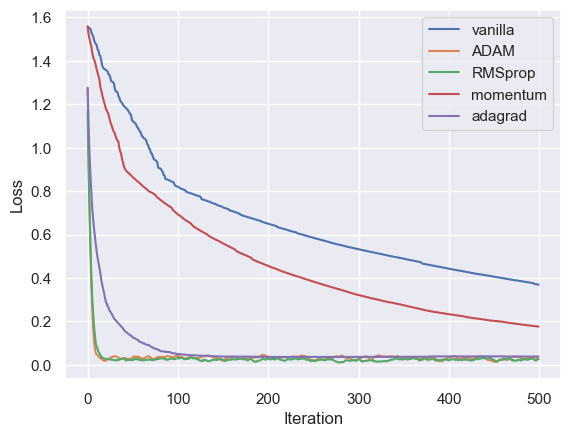

In [519]:
plt.plot(vanilla.f_history_,label="vanilla")
plt.plot(ADAM.f_history_,label="ADAM")
plt.plot(RMSprop.f_history_,label="RMSprop")
plt.plot(momentum.f_history_,label="momentum")
plt.plot(adagrad.f_history_,label="adagrad")
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend()
plt.show()

Implement only one acceleration method and compare the results

## Study of the batchsize impact

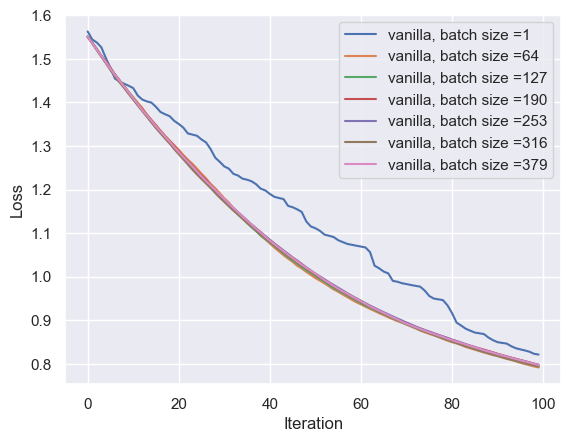

In [528]:
#TODO : Study the loss
for b in range(1,6*64+1,63):
    vanilla = StochasticLogisticRegression(lambd=0.01,thresh=0.6,lr=1e-2)
    vanilla.fit(X_train, y_train,minibatch=True,bsize=b,max_iter=100,method="vanilla")
    plt.plot(vanilla.f_history_,label="vanilla, batch size ="+str(b))
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend()
plt.show()

No handles with labels found to put in legend.


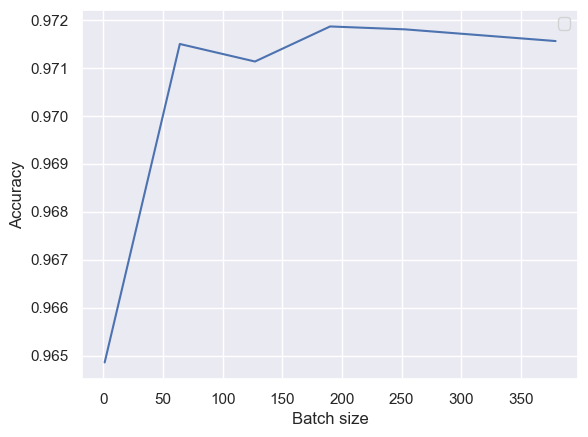

In [533]:
#TODO : Study the accuracy
batch=[]
acc=[]
for b in range(1,6*64+1,63):
    vanilla = StochasticLogisticRegression(lambd=0.01,thresh=0.6,lr=1e-2)
    vanilla.fit(X_train, y_train,minibatch=True,bsize=b,max_iter=500,method="vanilla")
    acc.append(vanilla.accuracy_evaluation(X_test,y_test)['accuracy'])
    batch.append(b)
plt.plot(batch,acc)
plt.ylabel('Accuracy')
plt.xlabel('Batch size')
plt.legend()
plt.show()

## Gamma impact

100%|██████████| 20/20 [00:23<00:00,  1.18s/it]


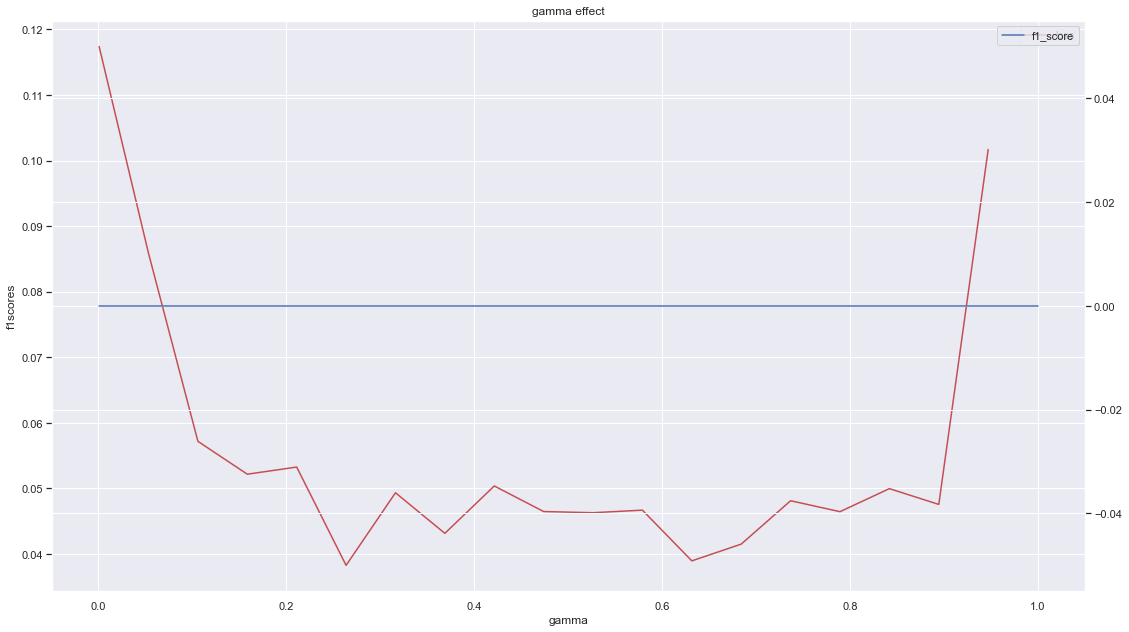

In [38]:
#TODO : Study Loss and F1-score
# To do so we'll use ADAM optimizer 

gammas   = np.linspace(0.001,1,20)
losses = []
f1scores = []
for gamma in tqdm(gammas):
    model = StochasticLogisticRegression(lambd=0.01, lr=1e-2, thresh= 0.6, gamma= gamma)
    model.fit(X_train, y_train, max_iter= 500, method = 'ADAM', minibatch= True, bsize= 1)
    losses.append(model.f_history_[-1])
    f1scores.append(model.accuracy_evaluation(X_test,y_test)['f1_score'])

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(gammas, losses, label = 'loss', c = 'r')
ax.set_xlabel('gamma')
ax.set_ylabel('loss')
plt.legend()
ax2 = ax.twinx()
ax2.plot(gammas, f1scores, label = 'f1_score')
ax.set_xlabel('gamma')
ax.set_ylabel('f1scores')

plt.title('gamma effect')
plt.legend()

plt.show()

## Beta impact
Nous allons comparer les paramètres beta pour gamma = 0.999 et batch_size=1024

100%|██████████| 20/20 [03:19<00:00,  9.98s/it]


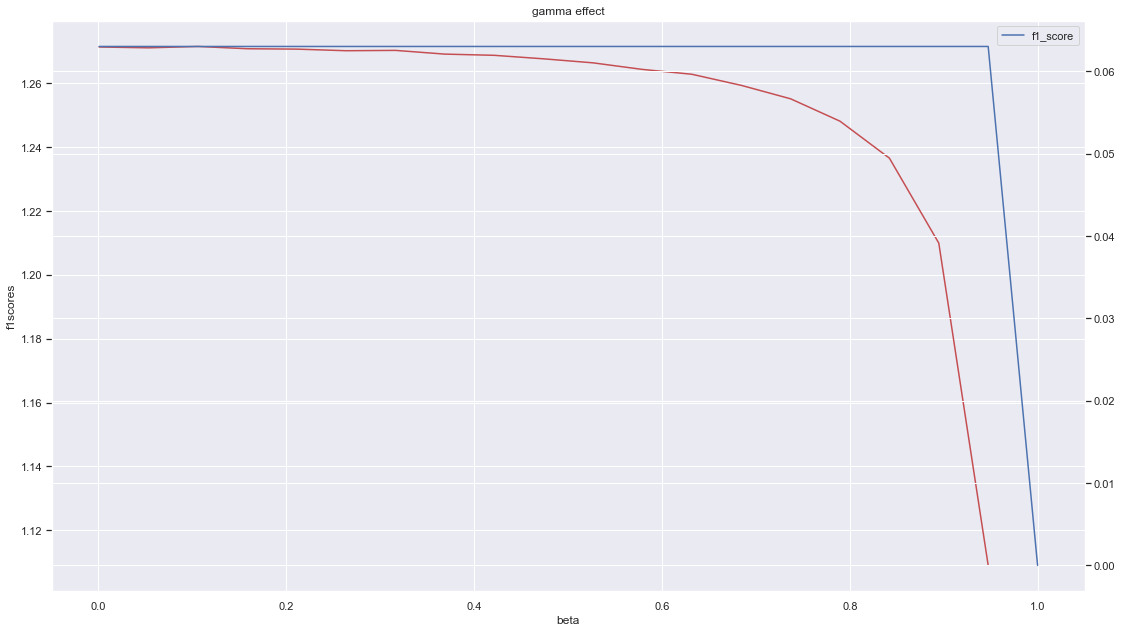

In [37]:
#TODO : Study Loss and F1-score
# To do so we'll use ADAM optimizer 

betas  = np.linspace(0.001,1,20)
losses = []
f1scores = []
for beta in tqdm(betas):
    model = StochasticLogisticRegression(lambd=0.01, lr=1e-2, beta=beta, gamma = 0.999)
    model.fit(X_train, y_train, max_iter= 500, method = 'ADAM', minibatch= True, bsize= 1024)
    losses.append(model.f_history_[-1])
    f1scores.append(model.accuracy_evaluation(X_test,y_test)['f1_score'])

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(betas, losses, label = 'loss', c = 'r')
ax.set_xlabel('beta')
ax.set_ylabel('loss')

ax2 = ax.twinx()
ax2.plot(betas, f1scores, label = 'f1_score')
ax.set_xlabel('beta')
ax.set_ylabel('f1scores')

plt.title('gamma effect')
plt.legend()

plt.show()